##### 1. EDA (Exploratory Data Analysis)

        a. Explore your data
        b. Examine distributions  
        c. Look for correlations 
        d. Identify nulls


   Unnamed: 0  gender  age        bmi  systolic_bp  diastolic_bp  \
0         746  Female   63  26.051019    96.865801     74.879872   
1         131    Male   51  28.999501   115.878612    113.660525   
2        1711  Female   76  21.135693   144.846268    132.404670   
3        1534    Male   77  21.610457          NaN    128.789122   
4         390  Female   68  22.311965   163.945914     84.559669   

  exercise_frequency  smoker  family_history diet_quality us_state  shoe_size  \
0          Regularly     0.0             0.0         Poor       PA   5.560992   
1          Regularly     1.0             0.0      Average       PA  12.098365   
2             Rarely     0.0             0.0         Poor       FL   6.751833   
3             Rarely     0.0             0.0          NaN       MI  11.893455   
4         Frequently     1.0             0.0      Average       NY   6.983366   

   cholesterol_level  has_disease  
0         208.921743            1  
1         246.817639            

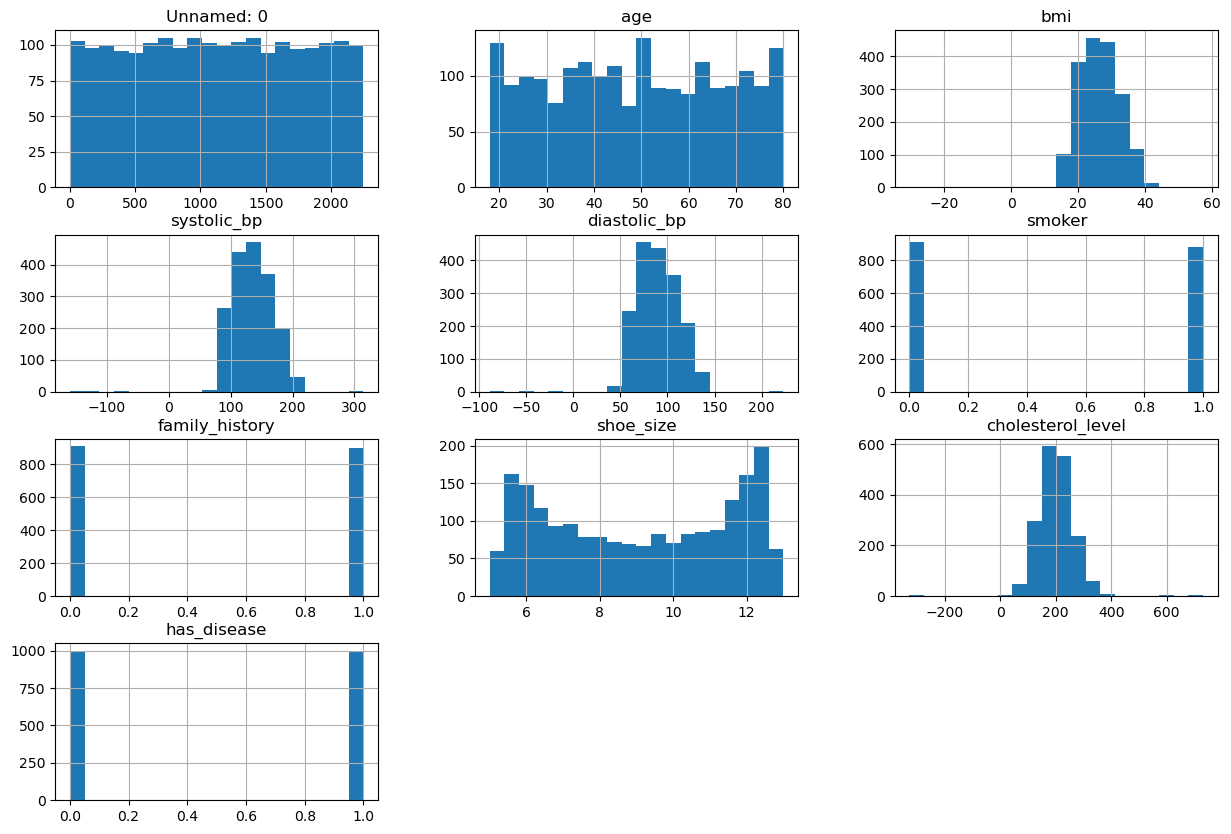

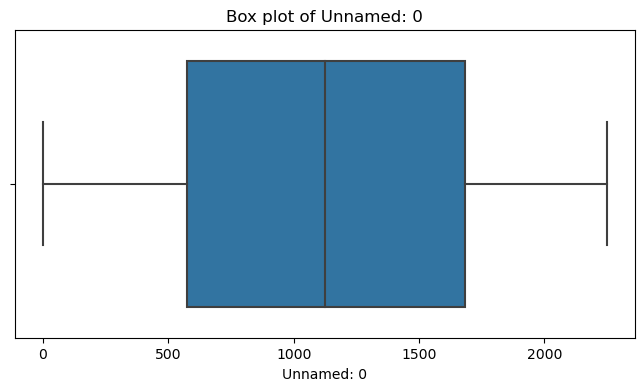

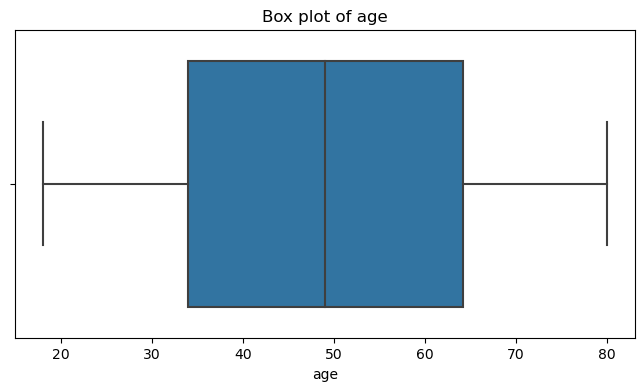

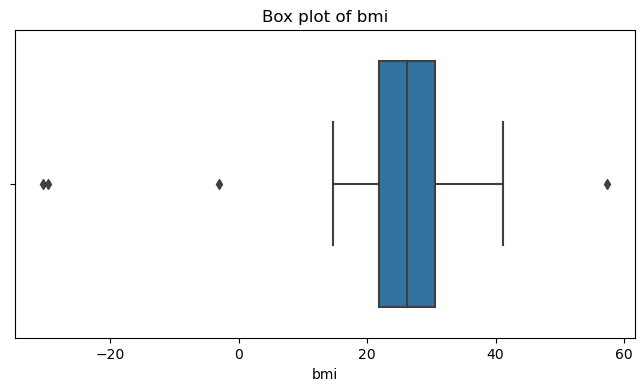

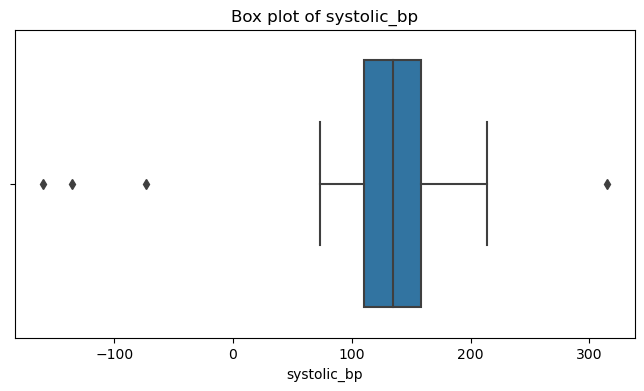

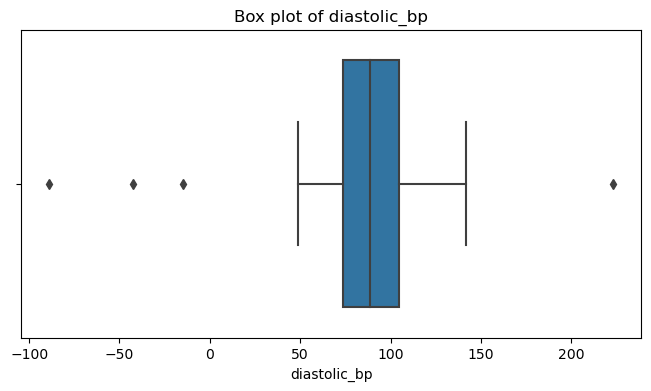

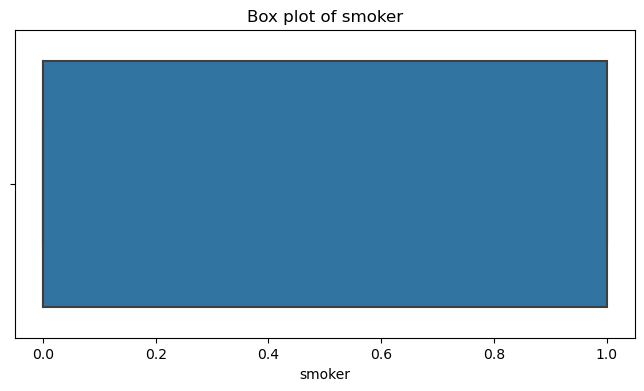

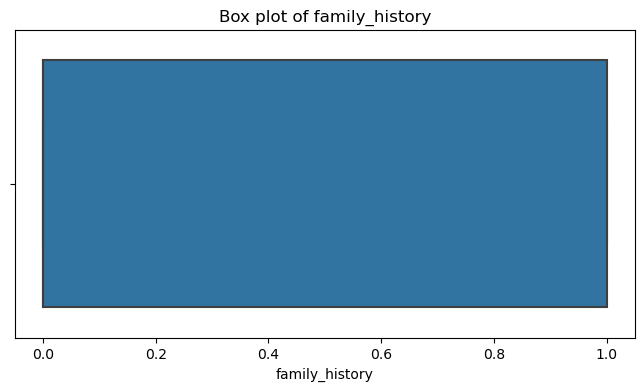

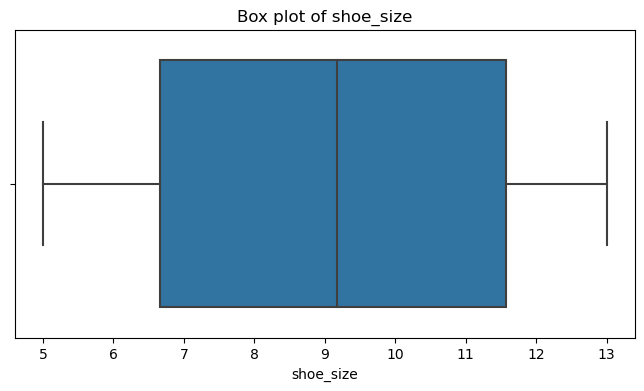

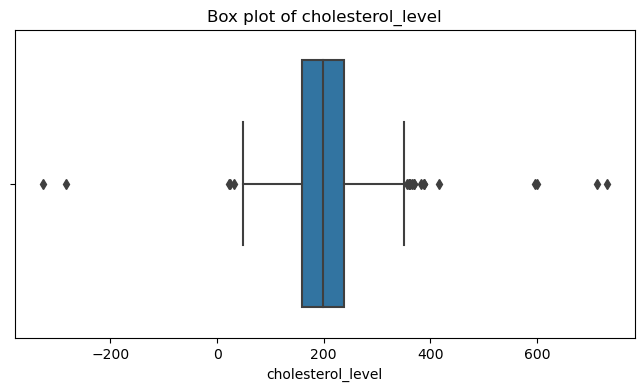

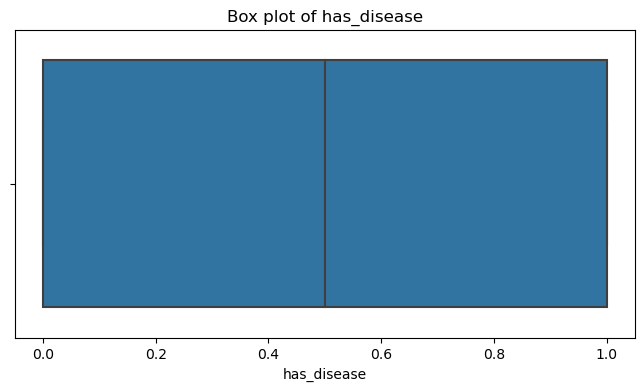

                   Unnamed: 0       age       bmi  systolic_bp  diastolic_bp  \
Unnamed: 0           1.000000 -0.007557 -0.027780     0.018038      0.024791   
age                 -0.007557  1.000000 -0.014862    -0.023657      0.015252   
bmi                 -0.027780 -0.014862  1.000000     0.015966     -0.019893   
systolic_bp          0.018038 -0.023657  0.015966     1.000000     -0.007924   
diastolic_bp         0.024791  0.015252 -0.019893    -0.007924      1.000000   
smoker              -0.029119 -0.021980  0.000664     0.010418      0.017481   
family_history      -0.021217 -0.001408 -0.016527    -0.037876     -0.015912   
shoe_size            0.009472 -0.074055 -0.082041    -0.005875     -0.022839   
cholesterol_level   -0.005016  0.273253 -0.003214     0.006660      0.061870   
has_disease         -0.036071  0.630255  0.369513     0.007374      0.021757   

                     smoker  family_history  shoe_size  cholesterol_level  \
Unnamed: 0        -0.029119       -0.02121

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns

# here we are Loading  the dataset
training_data = pd.read_csv('training_data.csv')
test_data = pd.read_csv('test_data.csv')

# Display the first few rows of the dataset
print(training_data.head())

# Exploratory Data Analysis (EDA)
print(training_data.describe())
print(training_data.info())
print(training_data.isnull().sum())

# Examine distributions of numerical features
import matplotlib.pyplot as plt
training_data.hist(bins=20, figsize=(15, 10))
plt.show()

#here we are generating Box plots to check for outliers in numeric columns
numeric_columns = training_data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=training_data[col])
    plt.title(f'Box plot of {col}')
    plt.show()

# Split features and target
X = training_data.drop(columns=['has_disease'])
y = training_data['has_disease']

# Define numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns


# Check for correlations between features after encoding categorical variables
correlation_matrix = training_data.drop(columns=categorical_features).corr()
print(correlation_matrix)

During exploratory data analysis, we identified a dataset consisting of 14 columns and 2000 rows, along with descriptive statistics for each column. Visualizations helped us understand the distribution of numerical data. Analyzing the correlation matrix revealed a significant positive correlation (0.63) between the presence of a disease and age. Moreover, we observed that the target variable exhibited positive associations with BMI and cholesterol levels, a negative correlation with shoe size, and relatively weaker correlations with systolic and diastolic blood pressure. This analysis enables us to make informed decisions about which features to include in our model before proceeding with training.

##### 2. Preprocessing
        a. Handle outliers 
        b. Encode features
        c. Standardize features
        d. Handle nulls (whether by imputation or some other method)

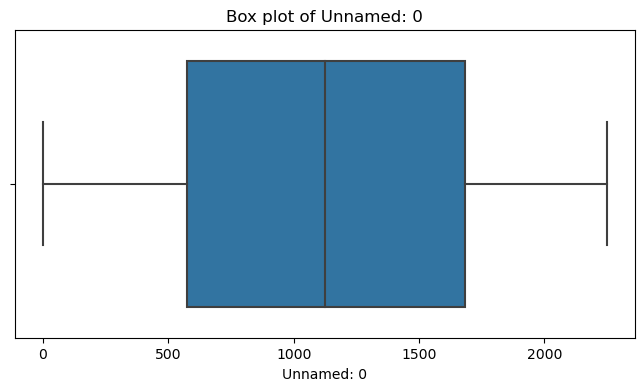

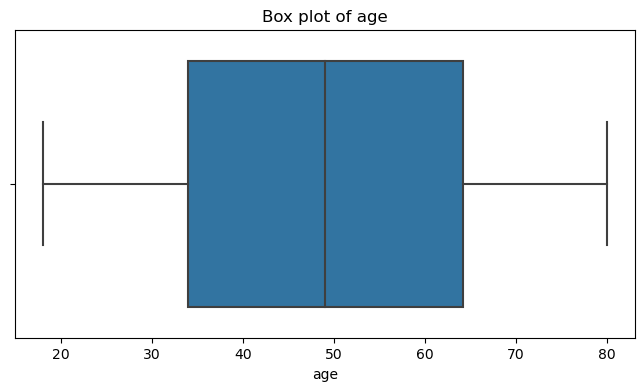

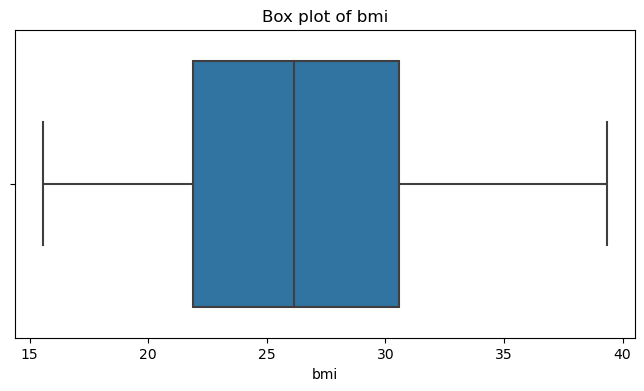

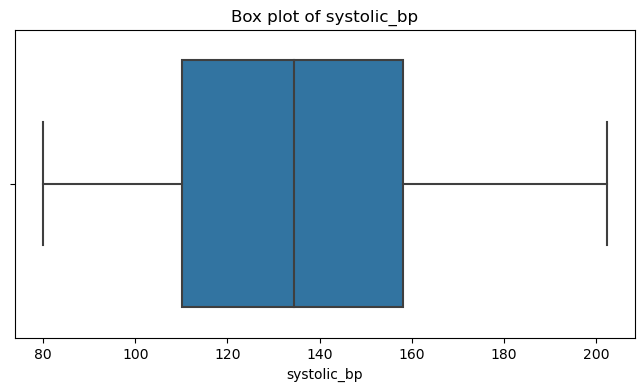

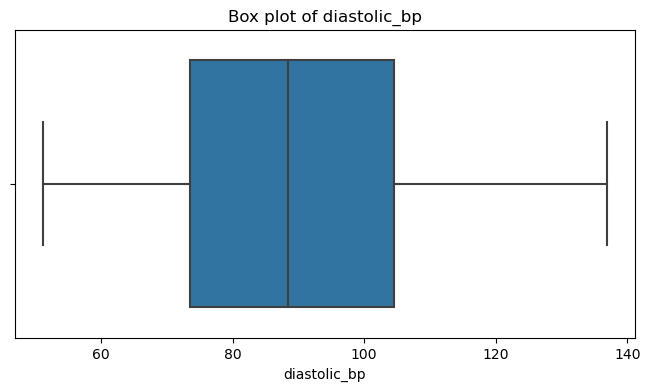

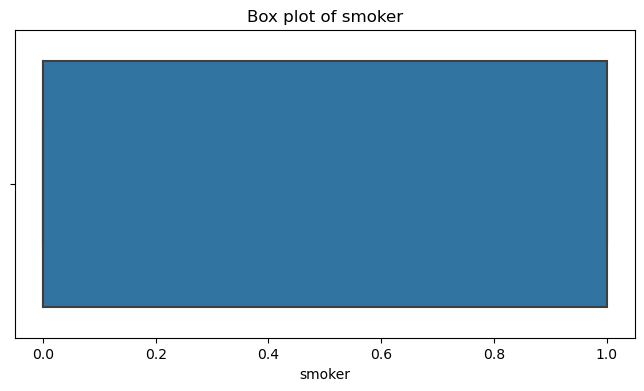

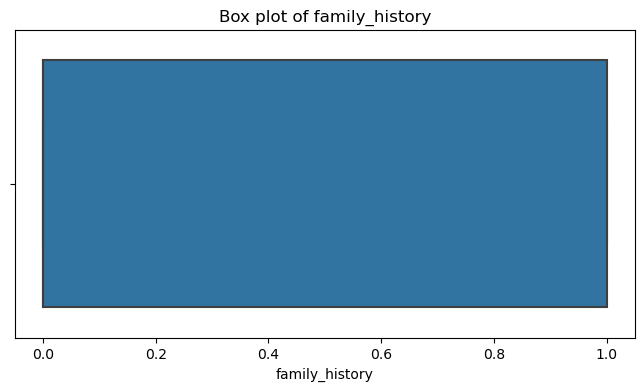

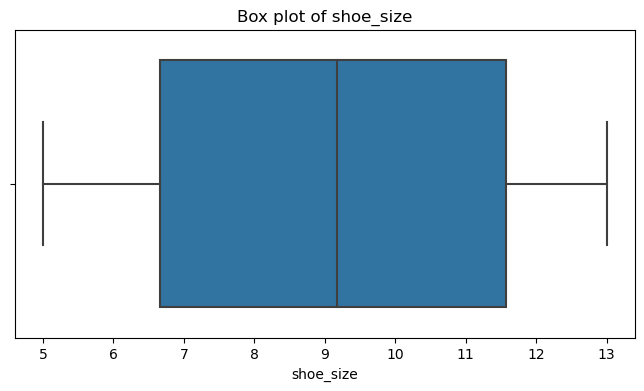

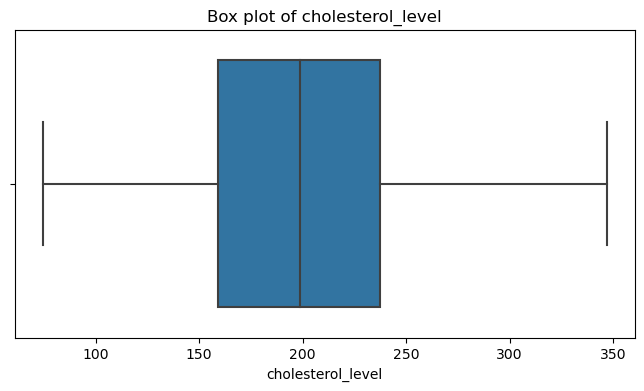

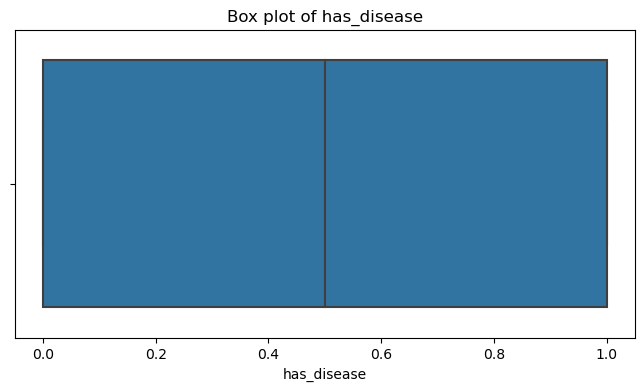

NameError: name 'outlier_indices' is not defined

In [2]:
# Preprocessing
# Handle outliers (assuming numeric columns only)
# You can identify outliers using various methods like z-score, IQR, or domain knowledge
from scipy.stats import zscore
import numpy as np
import pandas as pd

# Handling outliers 
for column in ['cholesterol_level', 'bmi', 'systolic_bp', 'diastolic_bp']:  # Replace with your numeric column names
    lower_bound = training_data[column].quantile(0.01)  
    upper_bound = training_data[column].quantile(0.99)  
    training_data[column] = np.clip(training_data[column], lower_bound, upper_bound)
    
#here we are again checking the box plots to see if the outliers are handled or not 
    numeric_columns = training_data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=training_data[col])
    plt.title(f'Box plot of {col}')
    plt.show()
#now here below we can see that all the outliers in numeric columns are handled and we can now see there are 
#no outliers 


# If you decide to remove outliers, you can do it like this:
training_data = training_data[~outlier_indices]


# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=17)


# Pipeline for preprocessing
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


During this process, we identified outliers and handled them using imputation on the training set , we further split the data for validation purposes and created pipelines for preprocessing

##### 3. Modelling and Evaluation
        a. Did you try more than one classifier?
        b. Use a cross-validation procedure?
        c. Avoid data leakage?
        d. Correctly evaluate F1-Score?

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Assuming X_train contains your features and y_train contains your target variable

# Define a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Replace 'numerical_features' with your numerical feature columns
        ('cat', OneHotEncoder(), categorical_features)   # Replace 'categorical_features' with your categorical feature columns
    ])

# Modeling & Evaluation

# Try different classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
}

best_f1 = 0
best_model = None

for name, clf in classifiers.items():
    # Create a pipeline with preprocessing and the classifier
    clf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', clf)])
    # Use cross-validation for model evaluation
    scores = cross_val_score(clf_pipeline, X_train, y_train, cv=5, scoring='f1')
    mean_f1 = scores.mean()
    print(f"{name} - Mean F1 Score: {mean_f1}")
    if mean_f1 > best_f1:
        best_f1 = mean_f1
        best_model = clf_pipeline

# Train the best model on the full training data
best_model.fit(X_train, y_train)



NameError: name 'X_train' is not defined

We tested 3 different models, namely Logistic Regression and Random Forest . The Random Forest Model has the highest Mean F1 score that is 86.6%. 

##### 4. Test Data
        a. Train you model appropriately?
        b. Impute data correctly?
        c. Achieve at least 65% f1 on the test data?
        d. Save your answers to an `answers.csv` file?

In [15]:

# Impute missing data using transformers trained on the training data
X_test = test_data.copy()  # assuming the test data has the same structure as training data

# Obtain probability predictions for the test data
prob_predictions = best_model.predict_proba(X_test)

# Convert probability predictions to percentage format
percentage_predictions = prob_predictions[:, 1] * 100  # Considering the probability of class 1 (index 1)

# Save percentage predictions to a file called "answers.csv"
answers = pd.DataFrame({'predictions': percentage_predictions})
answers.to_csv('answers.csv', index=False)


I utilized transformers trained on the training data to preprocess the test dataset. Subsequently, I stored the predictions generated on the test dataset in a file named "answers.csv".

Reference:
Chatgpt
https://chat.openai.com/
GeeksforGeeks
https://www.geeksforgeeks.org/
Money learn
https://monkeylearn.com/blog/what-is-a-classifier/#:~:text=What%20Is%20a%20Classifier%20in,label%3A%20Spam%20or%20Not%20Spam.
